Importing the necessary libraries

In [381]:
import numpy as np
import pandas as pd

In [382]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='ISO-8859-1')

In [383]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2319,ham,In which place do you want da.,NaN,NaN,NaN
3418,spam,Do you want a new Video phone? 600 anytime any...,NaN,NaN,NaN
2171,ham,I wont. So wat's wit the guys,NaN,NaN,NaN
1624,spam,500 free text msgs. Just text ok to 80488 and ...,NaN,NaN,NaN
3332,spam,You are being contacted by our dating service ...,NaN,NaN,NaN


In [384]:
df.shape

(5572, 5)

1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

**1. Data cleaning**

In [385]:
#Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [386]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [387]:
df.sample(5)

,v1,v2
1583,ham,"It's cool, let me know before it kicks off aro..."
600,ham,Mind blastin.. No more Tsunamis will occur fro...
5075,ham,"Well, i'm glad you didn't find it totally disa..."
5214,spam,Natalja (25/F) is inviting you to be her frien...
2368,ham,If you r @ home then come down within 5 min


In [388]:
# rename the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4016,ham,Eek that's a lot of time especially since Amer...
632,ham,Oh that was a forwarded message. I thought you...
4662,ham,No. Yes please. Been swimming?
2913,spam,Sorry! U can not unsubscribe yet. THE MOB offe...
4037,ham,Hope you are not scared!


In [389]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [390]:
df['target']=encoder.fit_transform(df['target'])

In [391]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [392]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [393]:
# check for duplicate values
df.duplicated().sum()

403

In [394]:
df=df.drop_duplicates(keep='first')

In [395]:
df.duplicated().sum()

0

In [396]:
df.shape

(5169, 2)

**2. EDA**

In [397]:
# EDA
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [398]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

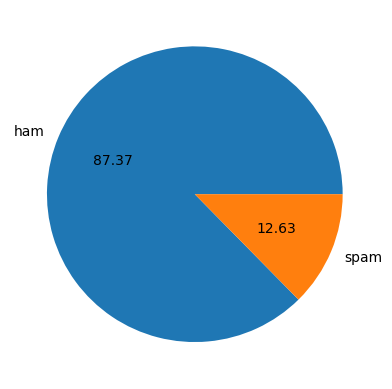

In [399]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [400]:
# data is imbalanced

In [401]:
import nltk

In [402]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [403]:
df['num_characters']=df['text'].apply(len)

In [404]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [405]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [406]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [407]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [408]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [409]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [410]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [411]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [412]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

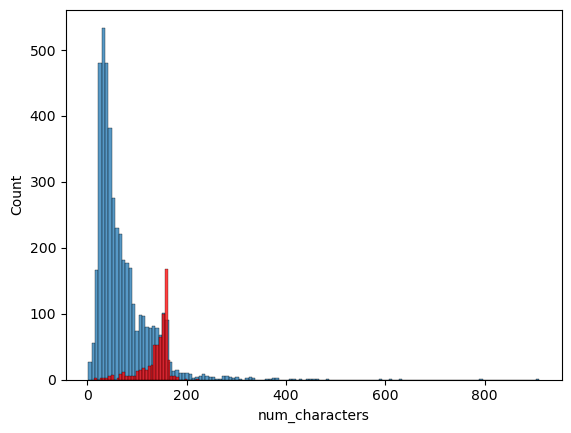

In [413]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


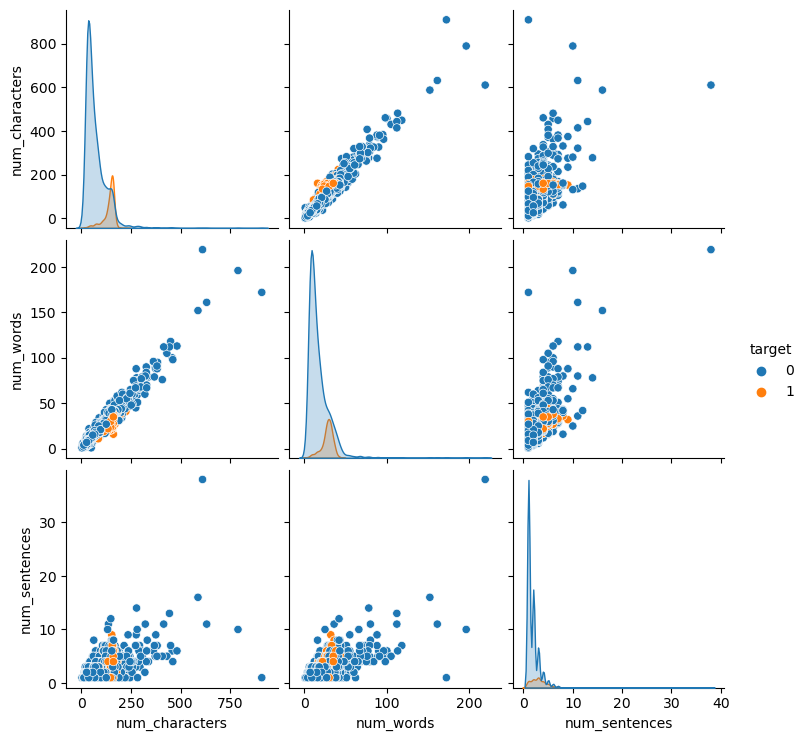

In [414]:
sns.pairplot(df,hue='target')

/tmp/ipykernel_32/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

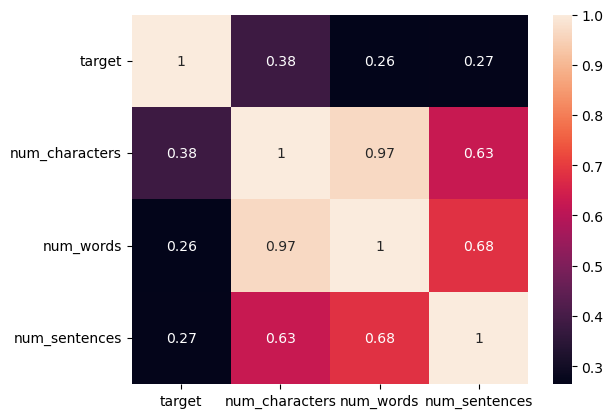

In [415]:
sns.heatmap(df.corr(),annot=True)

**3. Data Preprocssing**
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [416]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [417]:
transform_text('Hi how Are YOU nitish?Dance')

'hi nitish danc'

In [418]:
df['transformed_text']=df['text'].apply(transform_text)

In [419]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [420]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [421]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

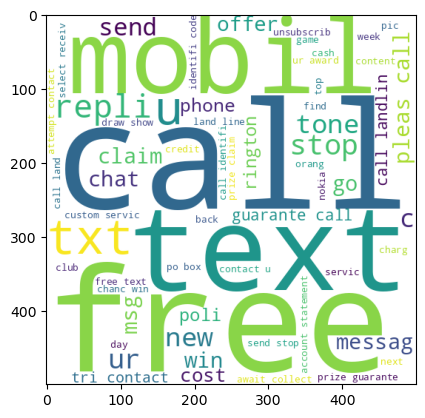

In [422]:
plt.imshow(spam_wc)

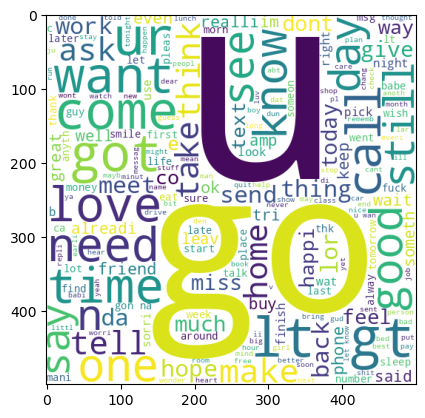

In [423]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))
plt.imshow(ham_wc)

In [424]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [425]:
len(spam_corpus)

9883

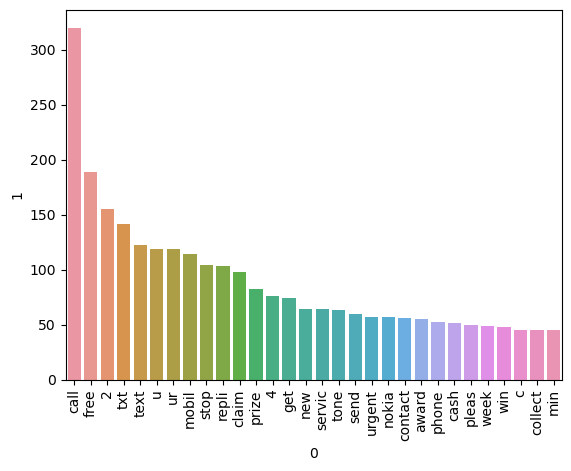

In [426]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [427]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [428]:
len(ham_corpus)

34771

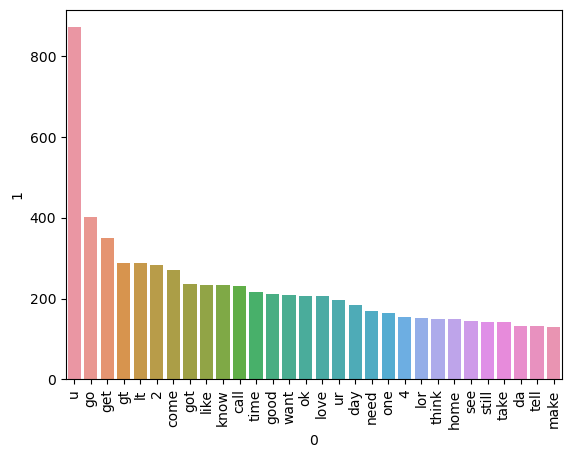

In [429]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**4. Model Building**

In [430]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [431]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [432]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)

In [433]:
x.shape

(5169, 3000)

In [434]:
y=df['target'].values

In [435]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [436]:
from sklearn.model_selection import train_test_split

In [437]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [438]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [439]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [440]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred1))
print('Confusion matrix:',confusion_matrix(y_test,y_pred1))
print('Precision score:',precision_score(y_test,y_pred1))

Accuracy: 0.867504835589942
Confusion matrix: [[785 111]
 [ 26 112]]
Precision score: 0.5022421524663677


In [441]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred2))
print('Confusion matrix:',confusion_matrix(y_test,y_pred2))
print('Precision score:',precision_score(y_test,y_pred2))

Accuracy: 0.9729206963249516
Confusion matrix: [[896   0]
 [ 28 110]]
Precision score: 1.0


In [442]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred3))
print('Confusion matrix:',confusion_matrix(y_test,y_pred3))
print('Precision score:',precision_score(y_test,y_pred3))

Accuracy: 0.9816247582205029
Confusion matrix: [[895   1]
 [ 18 120]]
Precision score: 0.9917355371900827


In [443]:
# tfidf --> MNB